In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/flight.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
r=pd.read_excel('/content/drive/MyDrive/flight.xlsx')

In [ ]:
df.shape

(10683, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(columns='Additional_Info',axis=1,inplace=True)

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [ ]:
df['Duration'].astype(str)
d=list(df['Duration'])
duration=[]
def dur():
  for i in range(len(d)):
    z=d[i]
    if len(z.split(sep=' '))!=2:
      if 'h' in z:
        z=z.split(sep='h')[0]
        x=int(z)
        duration.append(60*x)
      else:
        z=z.split(sep='m')[0]
        x=int(z)
        duration.append(x)
    else:
      h=z.split(sep=' ')[0]
      h=h.split(sep='h')[0]
      h=int(h)
      m=z.split(sep=' ')[1]
      m=m.split(sep='m')[0]
      m=int(m)
      duration.append(60*h+m)

In [ ]:
type(d)

list

In [ ]:
dur()
df['duration(mins)']=duration

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,duration(mins)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,285


In [ ]:
df.drop(columns='Duration',axis=1,inplace=True)

In [ ]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
df.loc[(df ['Total_Stops']=='non-stop'), "Number_of_stops"]=0
df.loc[(df ['Total_Stops']=='1 stop'), "Number_of_stops"]=1
df.loc[(df ['Total_Stops']=='2 stops'), "Number_of_stops"]=2
df.loc[(df ['Total_Stops']=='3 stops'), "Number_of_stops"]=3
df.loc[(df ['Total_Stops']=='4 stops'), "Number_of_stops"]=4

In [ ]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [ ]:
df['date'] = df['Date_of_Journey'].dt.day 

In [ ]:
df['month'] = df['Date_of_Journey'].dt.month

In [ ]:
df['year'] = df['Date_of_Journey'].dt.year

In [ ]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

In [ ]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [ ]:
df['dep(hour)']=df['Dep_Time'].dt.hour

In [ ]:
df['dep(minute)']=df['Dep_Time'].dt.minute

In [ ]:
df['arr(hour)']=df['Arrival_Time'].dt.hour

In [ ]:
df['arr(min)']=df['Arrival_Time'].dt.minute

In [ ]:
df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Total_Stops'],axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Price,duration(mins),Number_of_stops,date,month,year,dep(hour),dep(minute),arr(hour),arr(min)
0,IndiGo,Banglore,New Delhi,BLR → DEL,3897,170,0.0,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662,445,2.0,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,13882,1140,2.0,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,6218,325,1.0,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,13302,285,1.0,3,1,2019,16,50,21,35


**Pandas Function**

In [ ]:
df.sort_values(by=['Number_of_stops'],ascending=False)

,Airline,Source,Destination,Route,Price,duration(mins),Number_of_stops,date,month,year,dep(hour),dep(minute),arr(hour),arr(min)
9182,Air India,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,17686,1770,4.0,3,1,2019,5,50,11,20
7031,Air India,Kolkata,Banglore,CCU → GAU → IMF → DEL → BLR,14015,805,3.0,5,12,2019,9,50,23,15
3945,Air India,Mumbai,Hyderabad,BOM → BLR → CCU → BBI → HYD,14260,1175,3.0,3,12,2019,16,50,12,25
5996,Air India,Kolkata,Banglore,CCU → GAU → IMF → DEL → BLR,15145,1040,3.0,24,3,2019,5,55,23,15
5947,Air India,Banglore,New Delhi,BLR → HBX → BOM → AMD → DEL,10573,715,3.0,3,3,2019,12,0,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,Air Asia,Kolkata,Banglore,CCU → BLR,3807,150,0.0,15,6,2019,22,50,1,20
7191,IndiGo,Banglore,Delhi,BLR → DEL,3943,170,0.0,18,5,2019,22,10,1,0
7194,Air India,Kolkata,Banglore,CCU → BLR,6245,150,0.0,4,1,2019,14,15,16,45
2736,Air India,Banglore,Delhi,BLR → DEL,6961,165,0.0,6,3,2019,10,0,12,45


In [ ]:
df.sort_values(by=['date', 'month','year'])

,Airline,Source,Destination,Route,Price,duration(mins),Number_of_stops,date,month,year,dep(hour),dep(minute),arr(hour),arr(min)
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,13302,285,1.0,3,1,2019,16,50,21,35
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,22270,1265,1.0,3,1,2019,8,0,5,5
56,Air India,Banglore,New Delhi,BLR → BOM → AMD → DEL,17345,905,2.0,3,1,2019,8,50,23,55
123,Air India,Delhi,Cochin,DEL → BOM → COK,27430,1215,1.0,3,1,2019,23,0,19,15
268,Air India,Chennai,Kolkata,MAA → CCU,19630,135,0.0,3,1,2019,11,40,13,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,9653,1595,2.0,27,6,2019,16,40,19,15
10594,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,12819,810,2.0,27,6,2019,23,5,12,35
10621,IndiGo,Kolkata,Banglore,CCU → BLR,4804,155,0.0,27,6,2019,22,15,0,50
10651,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,10678,460,1.0,27,6,2019,4,55,12,35


In [ ]:
print(df.groupby(['Airline']).count())

                                   Source  Destination  ...  arr(hour)  arr(min)
Airline                                                 ...                     
Air Asia                              319          319  ...        319       319
Air India                            1751         1751  ...       1751      1751
GoAir                                 194          194  ...        194       194
IndiGo                               2053         2053  ...       2053      2053
Jet Airways                          3849         3849  ...       3849      3849
Jet Airways Business                    6            6  ...          6         6
Multiple carriers                    1196         1196  ...       1196      1196
Multiple carriers Premium economy      13           13  ...         13        13
SpiceJet                              818          818  ...        818       818
Trujet                                  1            1  ...          1         1
Vistara                     

**Inference**: We were able to find out the number of journeys that were taken through each kind of Airline.

In [ ]:
print(df.groupby(['Source','Destination']).count())

                      Airline  Route  Price  ...  dep(minute)  arr(hour)  arr(min)
Source   Destination                         ...                                  
Banglore Delhi           1265   1265   1265  ...         1265       1265      1265
         New Delhi        932    932    932  ...          932        932       932
Chennai  Kolkata          381    381    381  ...          381        381       381
Delhi    Cochin          4536   4536   4536  ...         4536       4536      4536
Kolkata  Banglore        2871   2871   2871  ...         2871       2871      2871
Mumbai   Hyderabad        697    697    697  ...          697        697       697

[6 rows x 12 columns]


**Inference:** We were able to count the number of travels based on Sourse and Destination pairs

In [ ]:
table = pd.pivot_table(df, values=['duration(mins)', 'Number_of_stops'], index=['Source','Destination'],
                      aggfunc={'duration(mins)': np.mean,'Number_of_stops': np.mean})
table

Number_of_stops  duration(mins)
Source   Destination                                 
Banglore Delhi               0.000000      171.695652
         New Delhi           0.790773      654.077253
Chennai  Kolkata             0.000000      139.619423
Delhi    Cochin              1.209436      817.852734
Kolkata  Banglore            0.860676      747.248346
Mumbai   Hyderabad           0.157819      191.714491

**Inference:** With the help of pivot table, we were able to find the mean of duration and mean of number of stops w.r.t Source and destination.

In [ ]:
table = pd.melt(df, id_vars=['Airline'], value_vars=['Source'],
        var_name='source/dest', value_name='place')
table

,Airline,source/dest,place
0,IndiGo,Source,Banglore
1,Air India,Source,Kolkata
2,Jet Airways,Source,Delhi
3,IndiGo,Source,Kolkata
4,IndiGo,Source,Banglore
...,...,...,...
10677,Air Asia,Source,Kolkata
10678,Air India,Source,Kolkata
10679,Jet Airways,Source,Banglore
10680,Vistara,Source,Banglore



**Inference:** With the help of melt table, we were able to conclude the airlines and their source(starting point) of travel

In [ ]:
pd.crosstab(df['Airline'],df['Source'])

Source,Banglore,Chennai,Delhi,Kolkata,Mumbai
Airline,,,,,
Air Asia,89,0,80,150,0
Air India,332,25,746,512,136
GoAir,93,0,76,25,0
IndiGo,523,184,705,445,196
Jet Airways,788,0,1586,1256,219
Jet Airways Business,4,0,2,0,0
Multiple carriers,0,0,1196,0,0
Multiple carriers Premium economy,0,0,13,0,0
SpiceJet,181,128,87,300,122


**Inference:** With the help of crosstab, we were able to find the count of travels whose source is one of [Bangalore, chennai, Delhi, Kolkata, Mumbai] w.r.t Unique Airline.

In [ ]:
pd.crosstab(df['Airline'],df['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Airline,,,,,,
Air Asia,150,80,71,0,0,18
Air India,512,746,120,136,25,212
GoAir,25,76,69,0,0,24
IndiGo,445,705,366,196,184,157
Jet Airways,1256,1586,370,219,0,418
Jet Airways Business,0,2,0,0,0,4
Multiple carriers,0,1196,0,0,0,0
Multiple carriers Premium economy,0,13,0,0,0,0
SpiceJet,300,87,137,122,128,44


**Inference:** With the help of crosstab, we were able to find the count of travels whose destination is one of [Bangalore, Cochin, Delhi, New Delhi, Kolkata, Hyderabad] w.r.t Unique Airline.

**Descriptive Statistics**

Outlier Detection

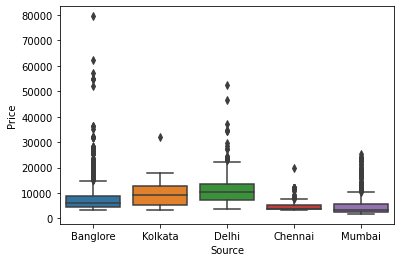

In [ ]:
sns.boxplot(x=df['Source'],y=df['Price'])

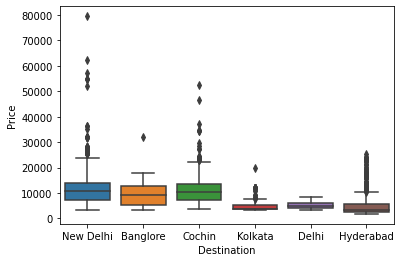

In [ ]:
sns.boxplot(x=df['Destination'],y=df['Price'])

In [ ]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
IQR=q3-q1
display(IQR)

7096.0

In [ ]:
lower_limit = q1 - 1.5*IQR
display(lower_limit)

-5367.0

In [ ]:
upper_limit = q3 + 1.5*IQR
display(upper_limit)

23017.0

In [ ]:
range = df['Price'].max() - df['Price'].min()
display('max:',df['Price'].max())
display('min:',df['Price'].min())
display('range:',range)

'max:'

79512

'min:'

1759

'range:'

77753

In [ ]:
df['Price'].mean()

9087.21456656057

In [ ]:
df.describe()

,Price,duration(mins),Number_of_stops,date,month,year,dep(hour),dep(minute),arr(hour),arr(min)
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,643.020502,0.824190,12.682925,5.534731,2019.0,12.491013,24.409287,13.349186,24.690601
std,4611.548810,507.830133,0.675229,8.803800,2.987626,0.0,5.748820,18.767801,6.859317,16.506808
min,1759.000000,5.000000,0.000000,3.000000,1.000000,2019.0,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,170.000000,0.000000,5.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,520.000000,1.000000,6.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,930.000000,1.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000
max,79512.000000,2860.000000,4.000000,27.000000,12.000000,2019.0,23.000000,55.000000,23.000000,55.000000


**Visualisation**

**Inference from the graphs is based on outlier detection from the following graphs 
1) Boxplot between duration and airline----> For Indigo and Jet Airways we can see there are values that are deviating from the relationship **bold text**
**

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'IndiGo'),
 Text(0, 0, 'IndiGo'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'IndiGo')]

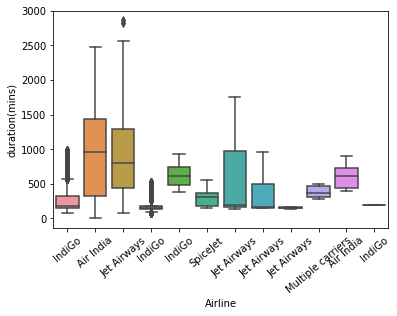

In [ ]:
g=sns.boxplot(x=df['Airline'],y=df['duration(mins)'])
g.set_xticklabels(labels=df['Airline'],rotation=40)

**For Outlier detection for the following graph shows that most of the relationships are having outliers , in the sense price can be high for different routes or places ** **bold text**

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'IndiGo'),
 Text(0, 0, 'IndiGo'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'IndiGo')]

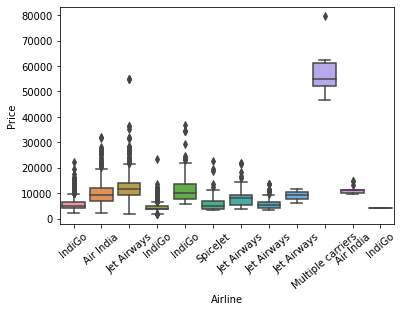

In [ ]:
g=sns.boxplot(x=df['Airline'],y=df['Price'])
g.set_xticklabels(labels=df['Airline'],rotation=40)

**Inference from the bar plot here is to find wheather Number of stops causes whether increase or either decrease in the price of the fare**

Text(0.5, 1.0, 'Prices for the Airline also checking wheather no_of stops play an imp role in price')

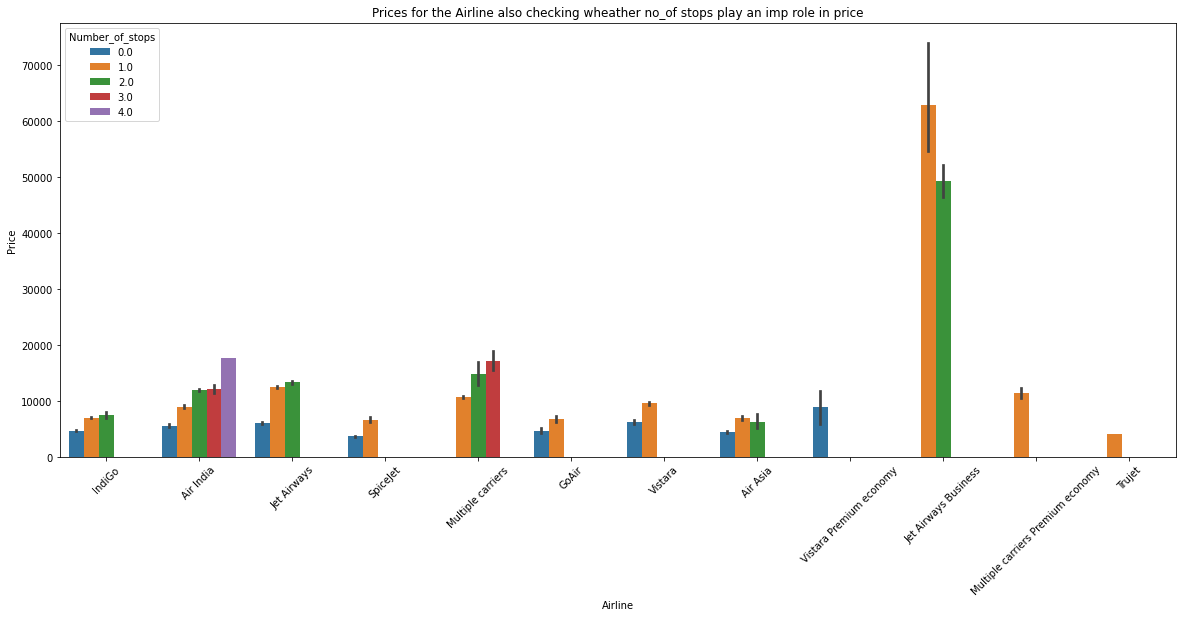

In [ ]:
plt.figure(figsize=(20,8))
g=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Number_of_stops'])
plt.xticks(rotation=45)
#g.set_xticklabels(labels=df['Airline'],rotation=40)
g.set_title('Prices for the Airline also checking wheather no_of stops play an imp role in price')

**In this pie plot we are trying to find percentage of source locations, basically in the sense we are trying to find the amount of flights that are present in a particular source**

In [ ]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Text(0.5, 1.0, 'percentage of flights that are present in that particular source ')

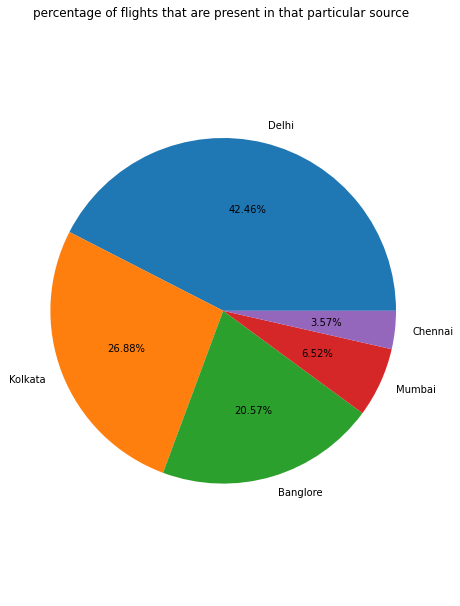

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
ax.axis('equal')
data=[4536,2871,2197,697,381]
diff=('Delhi','Kolkata','Banglore','Mumbai','Chennai')
ax.pie(data, labels =diff,autopct='%1.2f%%')
plt.title('percentage of flights that are present in that particular source ')

**The pie plot is as before is used to find the percentage of flights that are traveliing to various destinations, this pie plot can also be used to find the tourist locations**

In [ ]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Text(0.5, 1.0, 'percentage of airline comapnies')

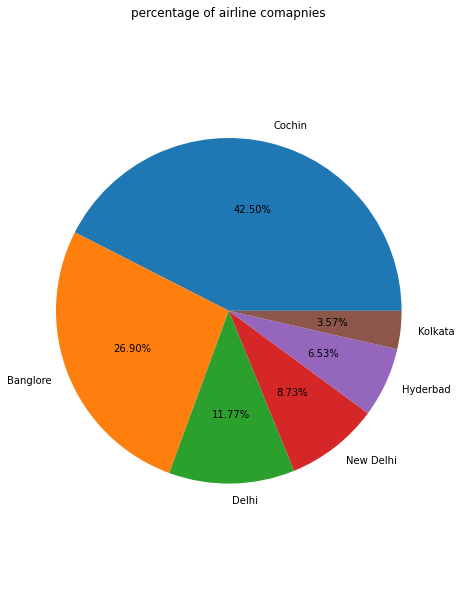

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
ax.axis('equal')
data=[4536,2871,1256,932,697,381]
diff=('Cochin','Banglore','Delhi','New Delhi','Hyderbad','Kolkata')
ax.pie(data, labels =diff,autopct='%1.2f%%')
plt.title('percentage of airline comapnies')

**The inference from the following plot is to check the most active flight timings , basically the timings the passengers prefer the most to travel**

Text(0.5, 1.0, 'Preferred Travel Timings')

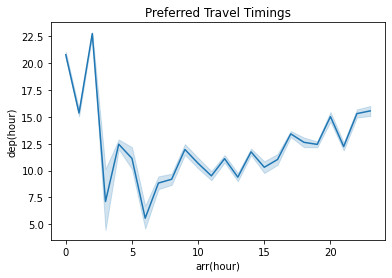

In [ ]:
g=sns.lineplot(x=df['arr(hour)'],y=df['dep(hour)'])
g.set_title('Preferred Travel Timings')

**This graph basically plots we can see many relations for example the relation between duration and the stops whether it increses the time or not, also the most prefered price ranges**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


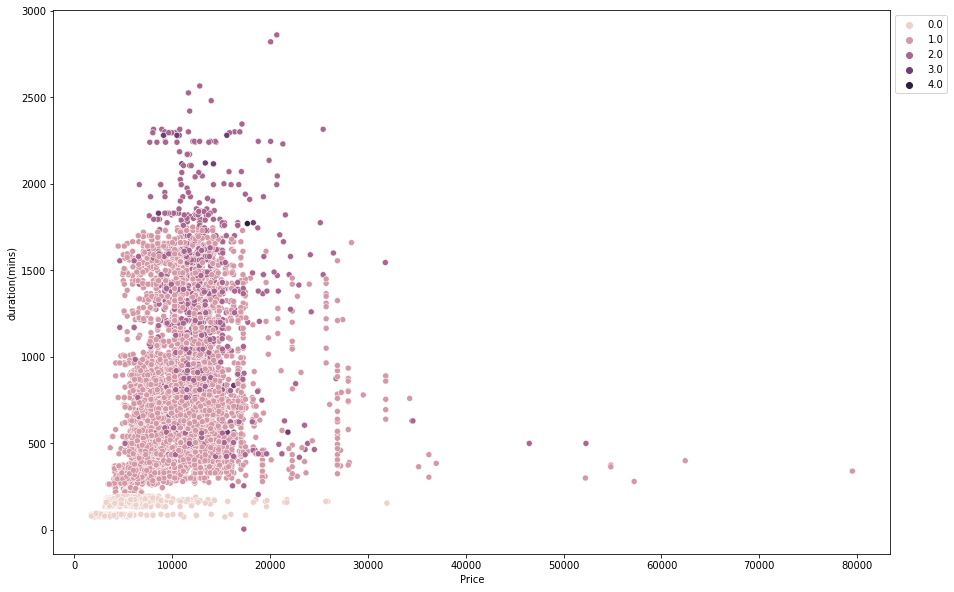

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(df['Price'],df['duration(mins)'],hue=df['Number_of_stops'])
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

****

**In this plot we basically try to find for the  range of the arrival times for a particular depature time Eg: for 12 is in the range from 3 to 24 , but most occuring arival time range is from 10 to 20**

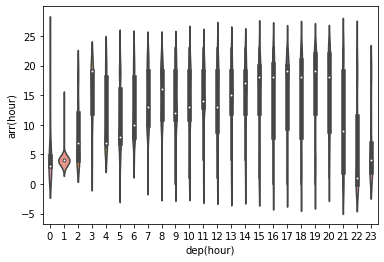

In [ ]:
sns.violinplot(x=df['dep(hour)'],y=df['arr(hour)'],data=df)
plt.show()

**Strip plot to check the airline flights provided from a particular source to destination**

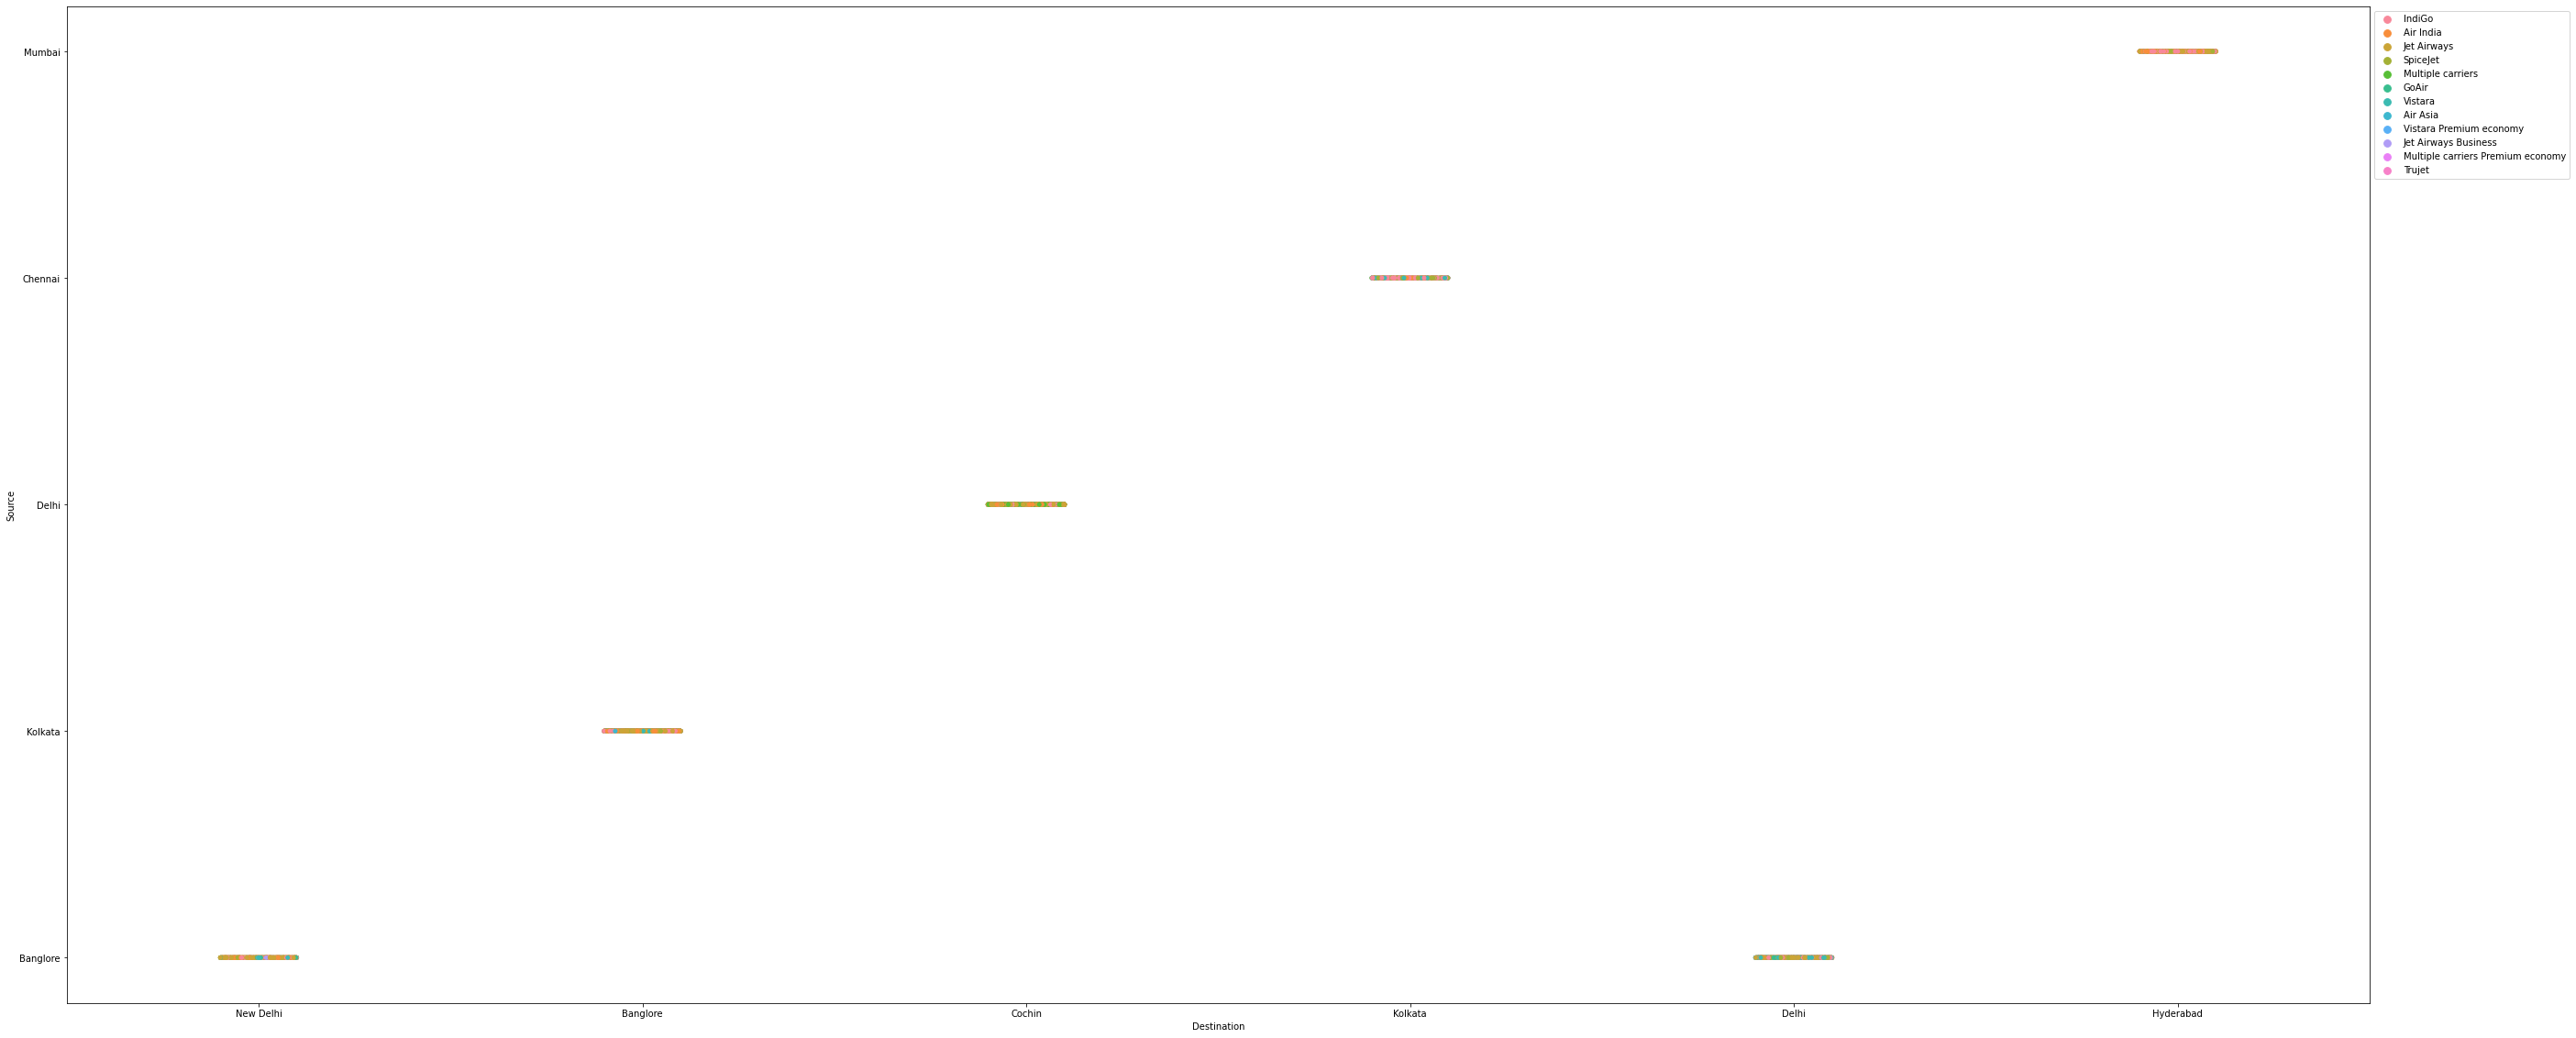

In [ ]:
plt.figure(figsize=(45,20))
sns.stripplot(x=df['Destination'],y=df['Source'],hue=df['Airline'],data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

**performing stack plot for the depature hour and arrival hour based on the duration**

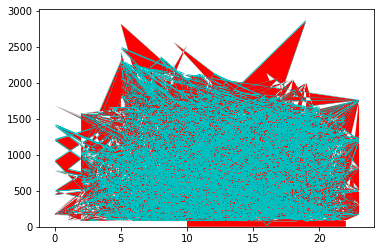

In [ ]:
plt.stackplot(df['dep(hour)'],df['duration(mins)'],df['arr(hour)'],
              colors =['r', 'c'])
plt.show()

**We can see the airlines that provide the best price for the given price and duration**

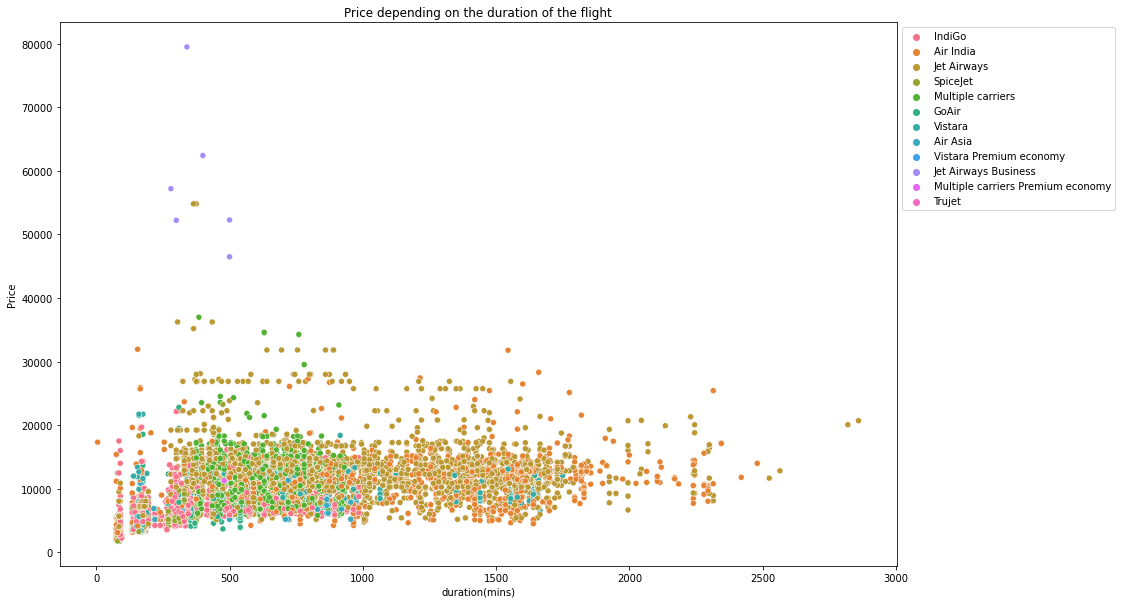

In [ ]:
plt.figure(figsize=(15,10))
g=sns.scatterplot(x=df['duration(mins)'],y=df['Price'],hue=df['Airline'])
g.set_title('Price depending on the duration of the flight')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

**Encoding**

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Airline'] = label_encoder.fit_transform(df['Airline'])
df['Source'] = label_encoder.fit_transform(df['Source'])
df['Destination'] = label_encoder.fit_transform(df['Destination'])

In [ ]:
df.head()

,Airline,Source,Destination,Route,Price,duration(mins),Number_of_stops,date,month,year,dep(hour),dep(minute),arr(hour),arr(min)
0,3,0,5,BLR → DEL,3897,170,0.0,24,3,2019,22,20,1,10
1,1,3,0,CCU → IXR → BBI → BLR,7662,445,2.0,5,1,2019,5,50,13,15
2,4,2,1,DEL → LKO → BOM → COK,13882,1140,2.0,6,9,2019,9,25,4,25
3,3,3,0,CCU → NAG → BLR,6218,325,1.0,5,12,2019,18,5,23,30
4,3,0,5,BLR → NAG → DEL,13302,285,1.0,3,1,2019,16,50,21,35


**Scaling**

MIn-Max Scaling

In [ ]:
df_min_max_scaled = df.copy()
df_notneeded = pd.DataFrame(df,columns=['Route','Price'])
df_min_max_scaled.drop(['Route','Price'],axis=1,inplace=True)
display(df_min_max_scaled.head())
display(df_notneeded.head())

,Airline,Source,Destination,duration(mins),Number_of_stops,date,month,year,dep(hour),dep(minute),arr(hour),arr(min)
0,3,0,5,170,0.0,24,3,2019,22,20,1,10
1,1,3,0,445,2.0,5,1,2019,5,50,13,15
2,4,2,1,1140,2.0,6,9,2019,9,25,4,25
3,3,3,0,325,1.0,5,12,2019,18,5,23,30
4,3,0,5,285,1.0,3,1,2019,16,50,21,35


,Route,Price
0,BLR → DEL,3897
1,CCU → IXR → BBI → BLR,7662
2,DEL → LKO → BOM → COK,13882
3,CCU → NAG → BLR,6218
4,BLR → NAG → DEL,13302


In [ ]:
#MIN-MAX scaling
for column in df_min_max_scaled.columns:
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

In [ ]:
result = pd.concat([df_min_max_scaled, df_notneeded], axis=1)
result.drop(columns=['year'],axis=1,inplace=True)
result.sample(5)

,Airline,Source,Destination,duration(mins),Number_of_stops,date,month,dep(hour),dep(minute),arr(hour),arr(min),Route,Price
4112,0.090909,0.0,1.0,0.514886,0.25,0.500,0.181818,0.347826,0.272727,0.347826,0.909091,BLR → HYD → DEL,5521
6438,0.545455,0.5,0.2,0.194396,0.25,0.125,0.727273,0.478261,0.727273,0.913043,0.000000,DEL → BOM → COK,7005
6837,0.272727,1.0,0.6,0.029772,0.00,0.125,0.000000,0.913043,0.363636,0.956522,0.909091,BOM → HYD,2227
9158,0.363636,0.5,0.2,0.380035,0.50,0.125,0.181818,0.782609,0.454545,0.521739,0.636364,DEL → BDQ → BOM → COK,14237
6210,0.090909,0.0,1.0,0.166375,0.25,0.500,0.181818,0.478261,0.909091,0.826087,0.909091,BLR → MAA → DEL,7192


In [ ]:
temp=result

In [ ]:
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
stop_words = ['→']

In [ ]:
result.head()

,Airline,Source,Destination,duration(mins),Number_of_stops,date,month,dep(hour),dep(minute),arr(hour),arr(min),Route,Price
0,0.272727,0.00,1.0,0.057793,0.00,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,BLR → DEL,3897
1,0.090909,0.75,0.0,0.154116,0.50,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,CCU → IXR → BBI → BLR,7662
2,0.363636,0.50,0.2,0.397548,0.50,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,DEL → LKO → BOM → COK,13882
3,0.272727,0.75,0.0,0.112084,0.25,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,CCU → NAG → BLR,6218
4,0.272727,0.00,1.0,0.098074,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,BLR → NAG → DEL,13302


In [ ]:
result.head()

,Airline,Source,Destination,duration(mins),Number_of_stops,date,month,dep(hour),dep(minute),arr(hour),arr(min),Route,Price
0,0.272727,0.00,1.0,0.057793,0.00,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,BLR → DEL,3897
1,0.090909,0.75,0.0,0.154116,0.50,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,CCU → IXR → BBI → BLR,7662
2,0.363636,0.50,0.2,0.397548,0.50,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,DEL → LKO → BOM → COK,13882
3,0.272727,0.75,0.0,0.112084,0.25,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,CCU → NAG → BLR,6218
4,0.272727,0.00,1.0,0.098074,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,BLR → NAG → DEL,13302


In [ ]:
df=temp
df

,Airline,Source,Destination,duration(mins),Number_of_stops,date,month,dep(hour),dep(minute),arr(hour),arr(min),Route,Price
0,0.272727,0.00,1.0,0.057793,0.00,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,BLR → DEL,3897
1,0.090909,0.75,0.0,0.154116,0.50,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,CCU → IXR → BBI → BLR,7662
2,0.363636,0.50,0.2,0.397548,0.50,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,DEL → LKO → BOM → COK,13882
3,0.272727,0.75,0.0,0.112084,0.25,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,CCU → NAG → BLR,6218
4,0.272727,0.00,1.0,0.098074,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,BLR → NAG → DEL,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.000000,0.75,0.0,0.050788,0.00,0.041667,0.727273,0.826087,1.000000,0.956522,0.454545,CCU → BLR,4107
10679,0.090909,0.75,0.0,0.052539,0.00,1.000000,0.272727,0.869565,0.818182,1.000000,0.363636,CCU → BLR,4145
10680,0.363636,0.00,0.4,0.061296,0.00,1.000000,0.272727,0.347826,0.363636,0.478261,0.363636,BLR → DEL,7229
10681,0.909091,0.00,1.0,0.054291,0.00,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,BLR → DEL,12648


In [ ]:
categorical=df
df

,Airline,Source,Destination,duration(mins),Number_of_stops,date,month,dep(hour),dep(minute),arr(hour),arr(min),Route,Price
0,0.272727,0.00,1.0,0.057793,0.00,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,BLR → DEL,3897
1,0.090909,0.75,0.0,0.154116,0.50,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,CCU → IXR → BBI → BLR,7662
2,0.363636,0.50,0.2,0.397548,0.50,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,DEL → LKO → BOM → COK,13882
3,0.272727,0.75,0.0,0.112084,0.25,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,CCU → NAG → BLR,6218
4,0.272727,0.00,1.0,0.098074,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,BLR → NAG → DEL,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.000000,0.75,0.0,0.050788,0.00,0.041667,0.727273,0.826087,1.000000,0.956522,0.454545,CCU → BLR,4107
10679,0.090909,0.75,0.0,0.052539,0.00,1.000000,0.272727,0.869565,0.818182,1.000000,0.363636,CCU → BLR,4145
10680,0.363636,0.00,0.4,0.061296,0.00,1.000000,0.272727,0.347826,0.363636,0.478261,0.363636,BLR → DEL,7229
10681,0.909091,0.00,1.0,0.054291,0.00,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,BLR → DEL,12648


In [ ]:
r

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]
categorical

,Airline,Source,Destination,duration(mins),Number_of_stops,date,month,dep(hour),dep(minute),arr(hour),arr(min),Route,Price,Route1,Route2,Route3,Route4,Route5
0,0.272727,0.00,1.0,0.057793,0.00,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,BLR → DEL,3897,BLR,DEL,NaN,NaN,NaN
1,0.090909,0.75,0.0,0.154116,0.50,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,CCU → IXR → BBI → BLR,7662,CCU,IXR,BBI,BLR,NaN
2,0.363636,0.50,0.2,0.397548,0.50,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,DEL → LKO → BOM → COK,13882,DEL,LKO,BOM,COK,NaN
3,0.272727,0.75,0.0,0.112084,0.25,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,CCU → NAG → BLR,6218,CCU,NAG,BLR,NaN,NaN
4,0.272727,0.00,1.0,0.098074,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,BLR → NAG → DEL,13302,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.000000,0.75,0.0,0.050788,0.00,0.041667,0.727273,0.826087,1.000000,0.956522,0.454545,CCU → BLR,4107,CCU,BLR,NaN,NaN,NaN
10679,0.090909,0.75,0.0,0.052539,0.00,1.000000,0.272727,0.869565,0.818182,1.000000,0.363636,CCU → BLR,4145,CCU,BLR,NaN,NaN,NaN
10680,0.363636,0.00,0.4,0.061296,0.00,1.000000,0.272727,0.347826,0.363636,0.478261,0.363636,BLR → DEL,7229,BLR,DEL,NaN,NaN,NaN
10681,0.909091,0.00,1.0,0.054291,0.00,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,BLR → DEL,12648,BLR,DEL,NaN,NaN,NaN


In [ ]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df=categorical
min_max_scaler = MinMaxScaler()
df[['Route1', 'Route2', 'Route3', 'Route4', 'Route5']] = min_max_scaler.fit_transform(df[['Route1', 'Route2', 'Route3', 'Route4', 'Route5']])
df

,Airline,Source,Destination,duration(mins),Number_of_stops,date,month,dep(hour),dep(minute),arr(hour),arr(min),Route,Price,Route1,Route2,Route3,Route4,Route5
0,0.272727,0.00,1.0,0.057793,0.00,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,BLR → DEL,3897,0.00,0.295455,1.000000,1.000000,1.0
1,0.090909,0.75,0.0,0.154116,0.50,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,CCU → IXR → BBI → BLR,7662,0.50,0.568182,0.034483,0.230769,1.0
2,0.363636,0.50,0.2,0.397548,0.50,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,DEL → LKO → BOM → COK,13882,0.75,0.727273,0.137931,0.384615,1.0
3,0.272727,0.75,0.0,0.112084,0.25,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,CCU → NAG → BLR,6218,0.50,0.772727,0.103448,1.000000,1.0
4,0.272727,0.00,1.0,0.098074,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,BLR → NAG → DEL,13302,0.00,0.772727,0.275862,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.000000,0.75,0.0,0.050788,0.00,0.041667,0.727273,0.826087,1.000000,0.956522,0.454545,CCU → BLR,4107,0.50,0.113636,1.000000,1.000000,1.0
10679,0.090909,0.75,0.0,0.052539,0.00,1.000000,0.272727,0.869565,0.818182,1.000000,0.363636,CCU → BLR,4145,0.50,0.113636,1.000000,1.000000,1.0
10680,0.363636,0.00,0.4,0.061296,0.00,1.000000,0.272727,0.347826,0.363636,0.478261,0.363636,BLR → DEL,7229,0.00,0.295455,1.000000,1.000000,1.0
10681,0.909091,0.00,1.0,0.054291,0.00,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,BLR → DEL,12648,0.00,0.295455,1.000000,1.000000,1.0


In [ ]:
df=df.drop('Route',axis=1)

**Outlier** **detection**

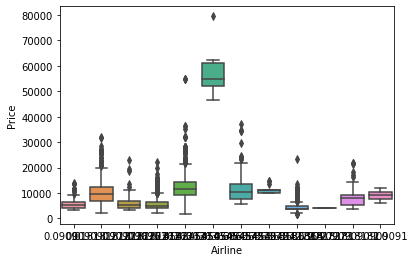

In [ ]:
sns.boxplot(x=df['Airline'],y=df['Price'])

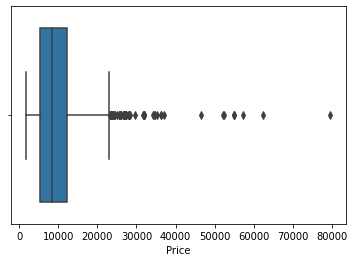

In [ ]:
sns.boxplot(x=df['Price'])

**Hypothesis testing**

**Z test**

Considering the price of flights we can tell that the average price is 9087.2 rs.A sample of 32 flights has an average greater than 9087.2 rs. The standard deviation of the population is 4611.5 rs. At α = 0.05, is there enough evidence to reject the claim.

In [ ]:
M=df['Price'].mean() #population mean

In [ ]:
df1=df['Price'].sample(32)

In [ ]:
m=df1.mean() #sample mean

In [ ]:
s=df['Price'].std() #population standard deviation

In [ ]:
M

9087.21456656057

In [ ]:
m

9104.75

In [ ]:
s

4611.548810094335

In [ ]:
import numpy as np
import scipy.stats as st

In [ ]:
#H0 : μ = 9087.2   Ha : μ > 9087.2
n = 32
xbar =  m
mu = M
sigma =  s
alpha = 0.05

In [ ]:
z = (xbar-mu)/(sigma/np.sqrt(n))
z

0.021510211699679354

In [ ]:
p_val=(1-st.norm.cdf(z))*2
p_val

0.9828386575900816

In [ ]:
if(p_val>alpha):
  print("Accept Null Hypothesis")
else:
  print("Reject Null Hypothesis")

Accept Null Hypothesis


**T test**

Considering the duration of movies we can tell that the average duration is 99.2 minutes.A random sample of 10 movies has an average duration of 106.8 minutes. The standard deviation of the population is 17 minutes. At α = 0.10, is there enough evidence to reject the claim?

In [ ]:
M=df['Price'].mean() #population mean

In [ ]:
df1=df['Price'].sample(50)

In [ ]:
m=df1.mean() #sample mean

In [ ]:
s=df1.std() #population standard deviation

In [ ]:
M

9087.21456656057

In [ ]:
m

9730.1

In [ ]:
s

4079.8680463355927

In [ ]:
import numpy as np
import scipy.stats as st

In [ ]:
#H0 : μ = 9087.2   Ha : μ < 9087.2
n = 50
degrees_of_freedom = n-1
xbar =  m
mu = M
sigma =  s
alpha = 0.05

In [ ]:
t = (xbar-mu)/(sigma/np.sqrt(n))
t

1.114223902215101

In [ ]:
t_critical=abs(st.t.ppf(0.05/2,degrees_of_freedom))
t_critical

2.0095752344892093

In [ ]:
if(t<t_critical):
  print("Accept Null Hypothesis")
else:
  print("Reject Null Hypothesis")

Accept Null Hypothesis


**Machine Learning Models**

In [ ]:
y=df['Price']
x=df.drop('Price',axis=1)

In [ ]:
result

,Airline,Source,Destination,duration(mins),Number_of_stops,date,month,dep(hour),dep(minute),arr(hour),arr(min),Route,Price,Route1,Route2,Route3,Route4,Route5
0,0.272727,0.00,1.0,0.057793,0.00,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,BLR → DEL,3897,0.00,0.295455,1.000000,1.000000,1.0
1,0.090909,0.75,0.0,0.154116,0.50,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,CCU → IXR → BBI → BLR,7662,0.50,0.568182,0.034483,0.230769,1.0
2,0.363636,0.50,0.2,0.397548,0.50,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,DEL → LKO → BOM → COK,13882,0.75,0.727273,0.137931,0.384615,1.0
3,0.272727,0.75,0.0,0.112084,0.25,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,CCU → NAG → BLR,6218,0.50,0.772727,0.103448,1.000000,1.0
4,0.272727,0.00,1.0,0.098074,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,BLR → NAG → DEL,13302,0.00,0.772727,0.275862,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.000000,0.75,0.0,0.050788,0.00,0.041667,0.727273,0.826087,1.000000,0.956522,0.454545,CCU → BLR,4107,0.50,0.113636,1.000000,1.000000,1.0
10679,0.090909,0.75,0.0,0.052539,0.00,1.000000,0.272727,0.869565,0.818182,1.000000,0.363636,CCU → BLR,4145,0.50,0.113636,1.000000,1.000000,1.0
10680,0.363636,0.00,0.4,0.061296,0.00,1.000000,0.272727,0.347826,0.363636,0.478261,0.363636,BLR → DEL,7229,0.00,0.295455,1.000000,1.000000,1.0
10681,0.909091,0.00,1.0,0.054291,0.00,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,BLR → DEL,12648,0.00,0.295455,1.000000,1.000000,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 120}

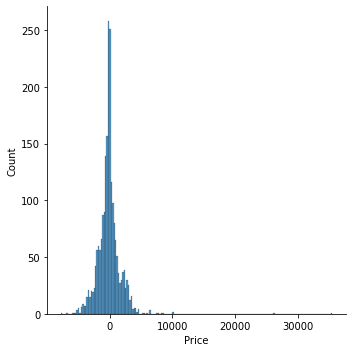

In [ ]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
r2_score(y_test,prediction)

0.8313916509762904

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)     

Model is: DecisionTreeRegressor()
Training score: 0.9693071159054724
Predictions are: [16840.  5752.  9397. ...  8327. 13339. 14151.]


r2 score is: 0.6438624775100347
MAE:1390.3250194977381
MSE:7679057.319076067
RMSE:2771.1112065516363


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


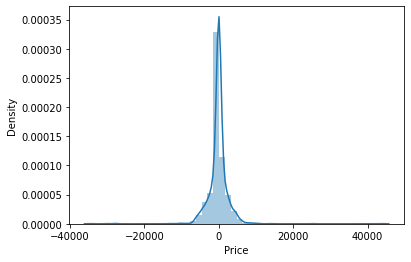

In [ ]:
predict(DecisionTreeRegressor())

Model is: KNeighborsRegressor()
Training score: 0.7965252230814815
Predictions are: [16315.   5903.4  8620.  ...  6471.8 11858.4 13167.6]


r2 score is: 0.6934951937961836
MAE:1635.1854000935891
MSE:6608873.894992981
RMSE:2570.773015066282


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


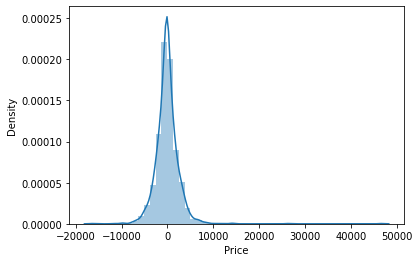

In [ ]:
predict(KNeighborsRegressor())

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = reg.predict(X_test)
print("Predictions are: {}".format(predictions))
print('\n')
r2score=r2_score(y_test,predictions) 
print("r2 score is: {}".format(r2score))
          
  

Predictions are: [12334.26582315 10717.32189507 11323.49598833 ...  9354.24249801
  9979.94578211 10359.5401708 ]


r2 score is: 0.5006668608006783
